In [1]:
# Student Name: Qadeer Hussain 
# Student ID: C00270632
# Module: Data Science & Machine Learning 
# Aim: The aim of this decision tree is to predict whether a loan application should be approved or rejected based on the applicants details

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Dataset can be downloaded from the following website https://www.kaggle.com/datasets/granjithkumar/loan-approval-data-set

In [4]:
# Load the data
loan_training_dataset = pd.read_csv('Loan_Train.csv')

In [5]:
# Print out the top 5 rows of data
loan_training_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Display initial information about missing values
print("Initial count of missing values per column:")
print(loan_training_dataset.isnull().sum())
print("Dataset size:", loan_training_dataset.shape)

Initial count of missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Dataset size: (614, 13)


In [7]:
# Drop rows with any missing values
loan_training_dataset.dropna(inplace=True)

In [8]:
# Print updated information about missing valuesd
print("After dropping rows with missing values:")
print(loan_training_dataset.isnull().sum())
print("New dataset size:", loan_training_dataset.shape)

After dropping rows with missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
New dataset size: (480, 13)


In [9]:
# Print out the top 5 rows of data
loan_training_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
# Encode the columns with categorical 
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
label_encoder = LabelEncoder()
for col in columns:
   # Apply LabelEncoder to the columns
   loan_training_dataset[col] = label_encoder.fit_transform(loan_training_dataset[col])

# Print the endocded
print("Encoded data sample:")
print(loan_training_dataset.head())

Encoded data sample:
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   
5  LP001011       1        1          2          0              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            

In [11]:
# One-hot encoding for categorical columns with more than two categories
columns_to_encode = ['Dependents', 'Property_Area']
one_hot_encoded_data = pd.get_dummies(loan_training_dataset, columns=columns_to_encode, drop_first=True)

In [12]:
# Drop 'Loan_ID' because it's  an identifier and 'Loan_Status' as it's the target
X = one_hot_encoded_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
# 'Loan_Status' column as the target variable
y = one_hot_encoded_data['Loan_Status']

In [13]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Create a Decision Tree classifier and fit it to the training data
dt_model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predict on the test data
y_pred = dt_model.predict(X_test)

In [16]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
print(class_report)

Accuracy: 0.7291666666666666
              precision    recall  f1-score   support

    Rejected       0.56      0.55      0.55        44
    Approved       0.80      0.81      0.81       100

    accuracy                           0.73       144
   macro avg       0.68      0.68      0.68       144
weighted avg       0.73      0.73      0.73       144



In [17]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy", accuracy)
print("F1-Score:", f1)

Precision: 0.801980198019802
Recall: 0.81
Accuracy 0.7291666666666666
F1-Score: 0.8059701492537313


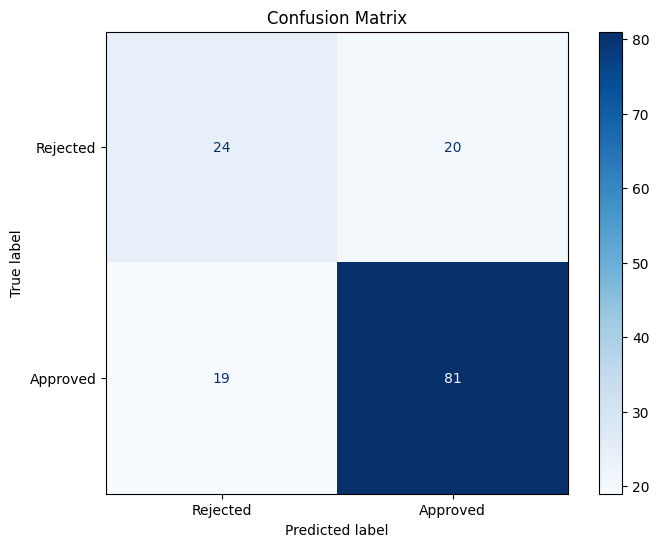

In [20]:
# Display the confusion matrix for the Decision Tree
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
cm_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

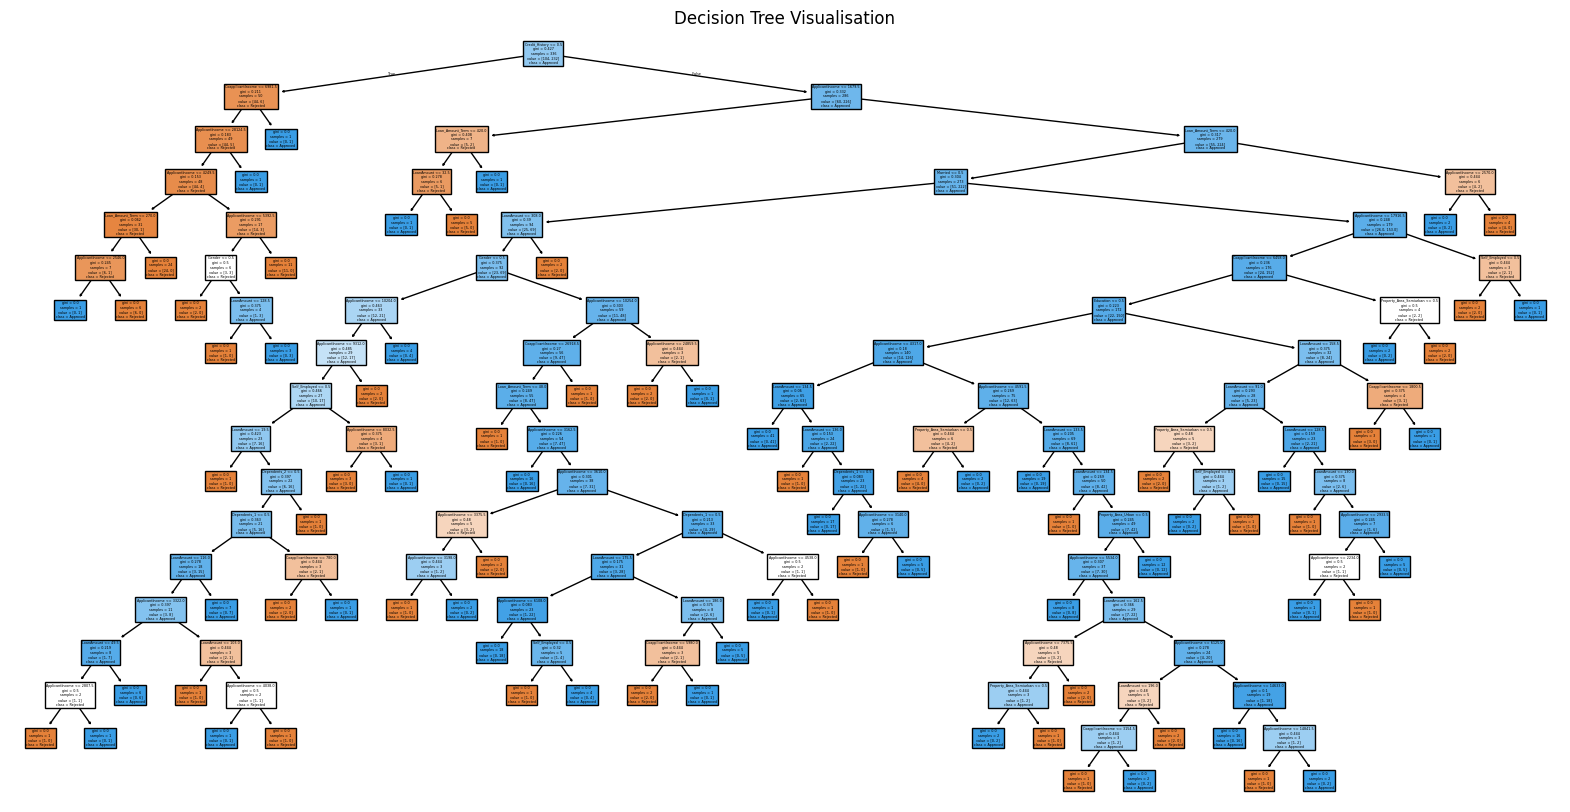

In [21]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
# Plot decision tree
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'], ax=ax)
# Title for the plot
plt.title('Decision Tree Visualisation')
# Display the plot
plt.show()

In [22]:
# By creating the above Decision tree we are able to create the confuion metrix report and visualise the Decision Tree. This Decision Tree is not readable. The tree depth was created to make the decision tree smaller and more readable.

In [23]:
# Set the tree depth variable
tree_depth = 3

In [24]:
# Create a Decision Tree classifier with a specified max depth and fit it to the training data
dt_model = DecisionTreeClassifier(max_depth=tree_depth, criterion='gini', min_samples_leaf=1, min_samples_split=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
# Predict on the test data
y_pred = dt_model.predict(X_test)

In [26]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

class_report = classification_report(y_test, y_pred, target_names=['Rejected', 'Approved'])
print(class_report)

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

    Rejected       0.77      0.39      0.52        44
    Approved       0.78      0.95      0.86       100

    accuracy                           0.78       144
   macro avg       0.78      0.67      0.69       144
weighted avg       0.78      0.78      0.75       144



In [27]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy", accuracy)
print("F1-Score:", f1)

Precision: 0.7786885245901639
Recall: 0.95
Accuracy 0.7777777777777778
F1-Score: 0.8558558558558559


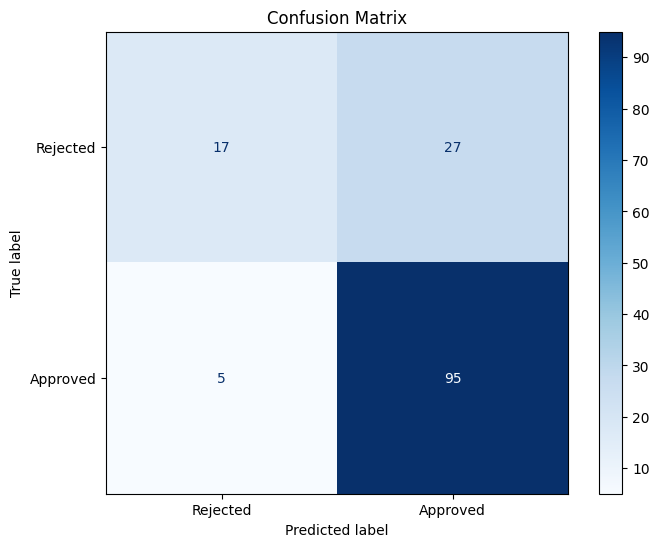

In [28]:
# Display the confusion matrix for the Decision Tree
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
cm_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

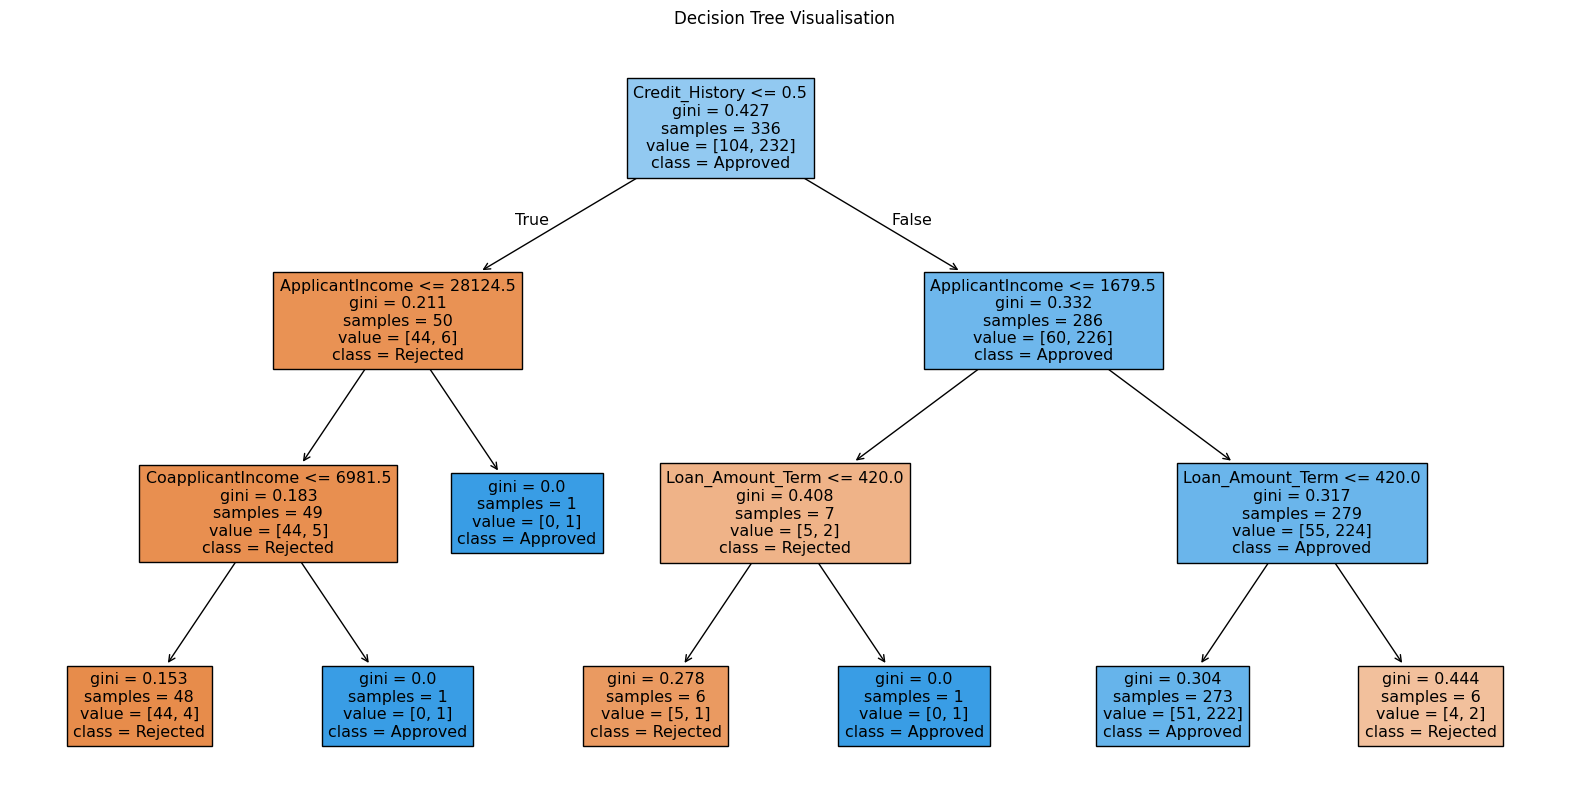

In [29]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Rejected', 'Approved'], ax=ax)
plt.title('Decision Tree Visualisation')
plt.show()

In [30]:
# Create a Random Forest model with a max depth
rf_model = RandomForestClassifier(max_depth=tree_depth, criterion='gini', min_samples_leaf=1, min_samples_split=2)

In [31]:
# Fit the Random Forest classifier to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [32]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

In [33]:
# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate a classification report
class_report_rf = classification_report(y_test, y_pred_rf, target_names=['Rejected', 'Approved'])
print(class_report_rf)

Random Forest Accuracy: 0.8125
              precision    recall  f1-score   support

    Rejected       0.95      0.41      0.57        44
    Approved       0.79      0.99      0.88       100

    accuracy                           0.81       144
   macro avg       0.87      0.70      0.73       144
weighted avg       0.84      0.81      0.79       144



In [34]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy", accuracy_rf)
print("F1-Score:", f1)

Precision: 0.792
Recall: 0.99
Accuracy 0.8125
F1-Score: 0.88


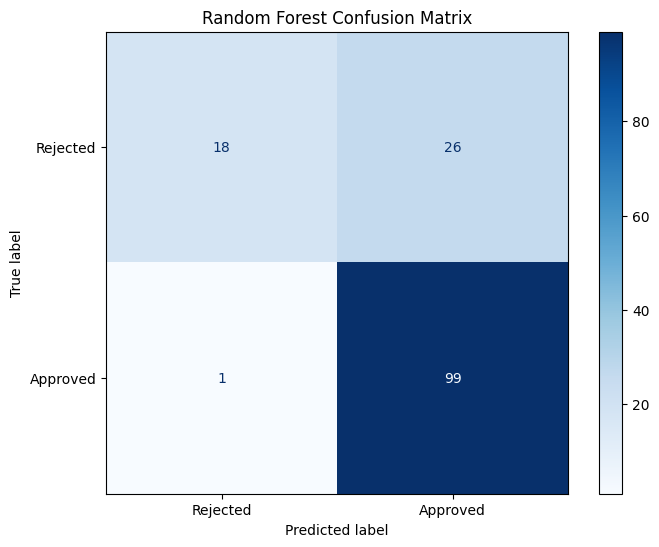

In [35]:
# Display the confusion matrix for the Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
cm_display.plot(ax=ax, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()